In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Q1. Load the dataset & Display the first 5 rows?
# Loads the dataset from a CSV file into a DataFrame (df).
# Used to bring the data into Python for analysis.

df = pd.read_csv("//content/Customer Purchases.csv")

# Displays the first 10 rows of the dataset.
# Helps quickly understand the structure of the data.

df.head(10)

,Customer ID,Age,Gender,Annual Income ($1000s),Spending Score,Product Category,Purchase Amount ($),Purchase Frequency
0,1001,56,Female,27,85,Clothing,762.63,12
1,1002,69,Female,46,100,Clothing,599.68,5
2,1003,46,Male,46,53,Clothing,476.86,5
3,1004,32,Male,40,23,Home & Kitchen,417.72,6
4,1005,60,Female,49,16,Home & Kitchen,355.38,9
5,1006,25,Male,116,57,Clothing,930.23,2
6,1007,38,Male,47,39,Sports,832.31,12
7,1008,56,Male,130,53,Electronics,965.38,3
8,1009,36,Female,80,42,Sports,133.05,12
9,1010,40,Female,67,58,Beauty,733.56,17


In [3]:
# # Q2. Checking for Missing Values?
# Checks for missing values in each column.
# Ensures data integrity and helps decide on data cleaning steps.

df.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Annual Income ($1000s),0
Spending Score,0
Product Category,0
Purchase Amount ($),0
Purchase Frequency,0


In [4]:
# # Q3. Describe Numeric Data?
# Summarizes numeric columns (mean, median, min, max, etc.).
# Useful for understanding data distribution.

df.describe()

,Customer ID,Age,Annual Income ($1000s),Spending Score,Purchase Amount ($),Purchase Frequency
count,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000
mean,1100.500000,43.42500,85.605000,48.705000,495.606100,10.305000
std,57.879185,14.94191,38.580582,28.832352,284.814869,5.368995
min,1001.000000,18.00000,20.000000,1.000000,14.590000,1.000000
25%,1050.750000,31.00000,50.500000,23.750000,231.707500,6.000000
50%,1100.500000,43.50000,84.500000,48.000000,477.105000,11.000000
75%,1150.250000,56.00000,118.250000,74.000000,744.410000,15.000000
max,1200.000000,69.00000,149.000000,100.000000,996.910000,19.000000


In [5]:
# # Q4. Count of Unique Products?
# Counts unique product categories.
# Helps identify the most and least popular categories.

df["Product Category"].value_counts()

,count
Product Category,
Clothing,47
Home & Kitchen,42
Electronics,39
Sports,36
Beauty,36


In [6]:
#Q5. Group by Gender with their Mean Purchase Amount?
# Calculates the average purchase amount for each gender.
# Helps in customer segmentation based on spending behavior.

df.groupby("Gender")["Purchase Amount ($)"].mean()

,Purchase Amount ($)
Gender,
Female,507.806636
Male,480.694333


In [7]:
# # Q6. Total purchase amount per product category?
# Computes total purchase amounts for each product category.
# Identifies the highest and lowest revenue-generating categories.

df.groupby("Product Category")["Purchase Amount ($)"].sum()

,Purchase Amount ($)
Product Category,
Beauty,17407.59
Clothing,24847.88
Electronics,15606.39
Home & Kitchen,23416.19
Sports,17843.17


In [8]:
# # Q7. Creating a new column?
# Creates a new column to estimate income per purchase.
# Useful for financial insights.

df["Income per Purchase"] = df["Annual Income ($1000s)"] / df["Purchase Frequency"]
df.head()

,Customer ID,Age,Gender,Annual Income ($1000s),Spending Score,Product Category,Purchase Amount ($),Purchase Frequency,Income per Purchase
0,1001,56,Female,27,85,Clothing,762.63,12,2.250000
1,1002,69,Female,46,100,Clothing,599.68,5,9.200000
2,1003,46,Male,46,53,Clothing,476.86,5,9.200000
3,1004,32,Male,40,23,Home & Kitchen,417.72,6,6.666667
4,1005,60,Female,49,16,Home & Kitchen,355.38,9,5.444444


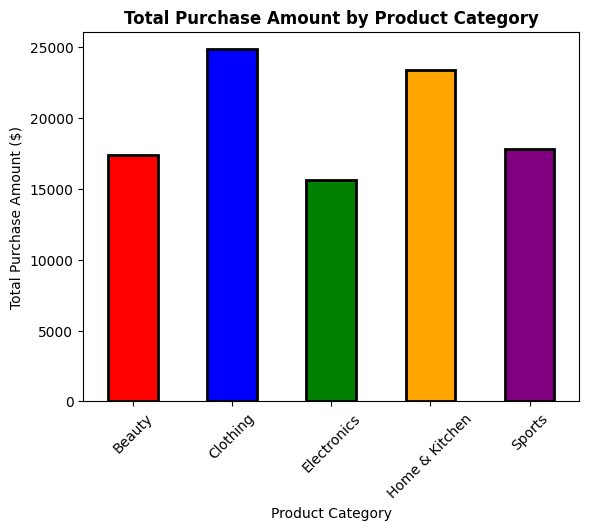

In [9]:
# Q8. Bar Plotting? (Category v/s Amount)
# - **Why?** To visualize total sales per product category.
# - **Outcome?** A colored bar chart showing purchase amounts by category.

category_sales = df.groupby("Product Category")["Purchase Amount ($)"].sum()
bar_colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow']
category_sales.plot(kind="bar", color=bar_colors, edgecolor="black",linewidth = 2)
plt.xlabel("Product Category")
plt.ylabel("Total Purchase Amount ($)")
plt.title("Total Purchase Amount by Product Category", fontweight = "bold")
plt.xticks(rotation=45)
plt.show()


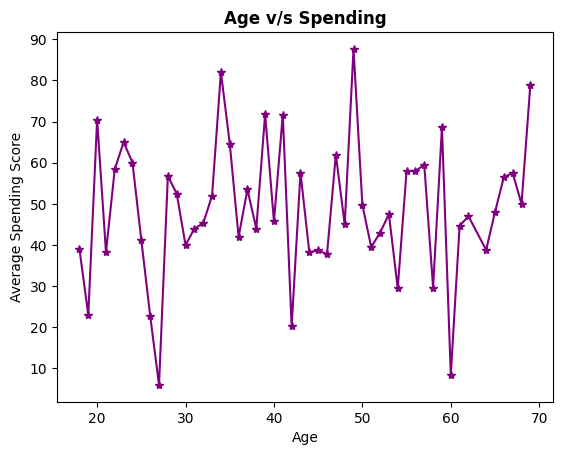

In [10]:
# Q9. Line Plotting? (Age v/s Spending)
# Why? To analyze the trend between age and average spending score.
# Outcome? A purple line chart showing how spending score varies with age.

age_spending = df.groupby("Age")["Spending Score"].mean()
plt.plot(age_spending.index, age_spending.values, marker="*", linestyle="-", color="purple")
plt.xlabel("Age")
plt.ylabel("Average Spending Score")
plt.title("Age v/s Spending", fontweight = "bold")
plt.show()

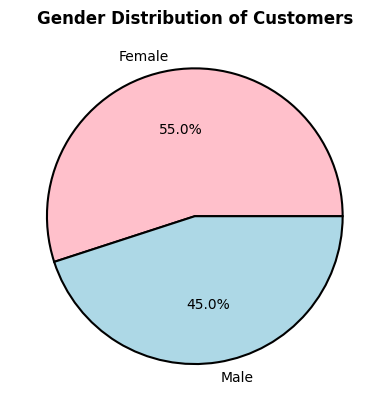

In [11]:
# Q10. Pie Charting?
# - **Why?** To visualize the gender distribution of customers.
# - **Outcome?** A pie chart showing the percentage of male and female customers.

gender_counts = df["Gender"].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", colors=["pink", "lightblue"], wedgeprops={"edgecolor": "black", "linewidth": 1.5})
plt.title("Gender Distribution of Customers", fontweight = "bold")
plt.show()

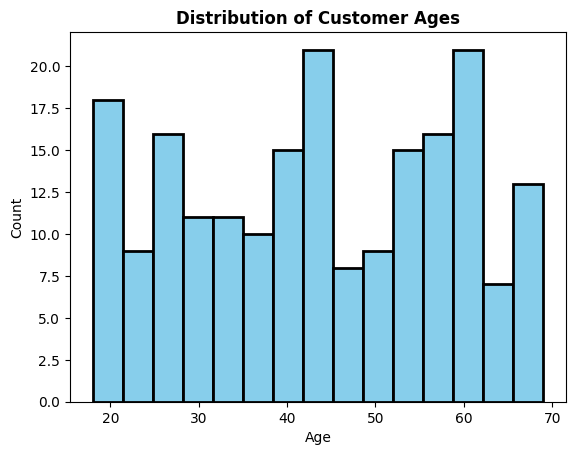

In [12]:
# Q11. Histogram for Age?
# - **Why?** To analyze the distribution of customer ages.
# - **Outcome?** A histogram showing the frequency of different age groups.

plt.hist(df["Age"], bins=15, color="skyblue", edgecolor="black", linewidth = 2)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Distribution of Customer Ages", fontweight = "bold")
plt.show()

Distribution Plot: 


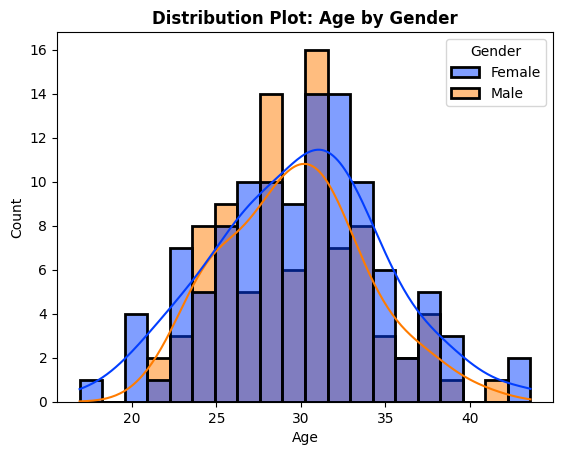

In [13]:
# Q12. Distribution plot?
# - **Why?** To visualize the age distribution by gender with density estimation.
# - **Outcome?** A histogram with KDE lines showing age distribution for males and females.

print("Distribution Plot: ")
np.random.seed(42)
df = pd.DataFrame({
   "Age": np.random.normal(loc=30, scale=5, size=200),
   "Gender": np.random.choice(["Male", "Female"], size=200)  # Added comma here
})

# Histogram with hue
sns.histplot(df, x="Age", hue="Gender", kde=True, bins=20, palette="bright", linewidth=2)
plt.title("Distribution Plot: Age by Gender", fontweight="bold")
plt.show()


<ipython-input-16-b2c6d27928de>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Product Category", y="Spending Score", data=df, palette="bright",  linewidth = 2)


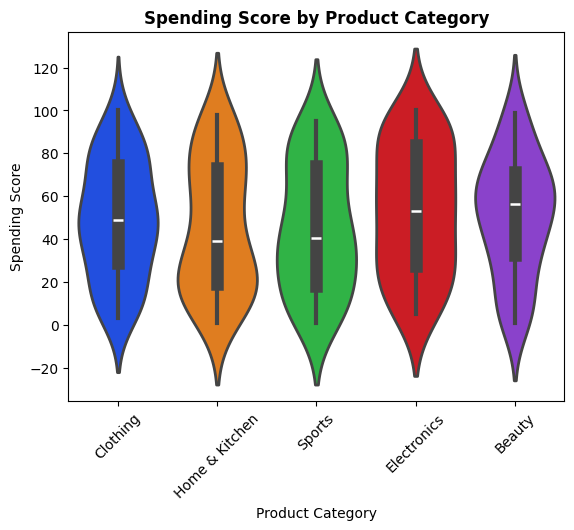

In [16]:
# Q13. Violin Plot? (Spending v/s Category)
# - **Why?** To visualize the distribution and density of spending scores across product categories.
# - **Outcome?** A violin plot showing spending score spread and density for each category.

sns.violinplot(x="Product Category", y="Spending Score", data=df, palette="bright",  linewidth = 2)
plt.xticks(rotation=45)
plt.title("Spending Score by Product Category", fontweight = "bold")
plt.show()

<ipython-input-17-ece6f3c345a6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Gender", y="Purchase Amount ($)", data=df, palette="bright", linewidth = 2 )


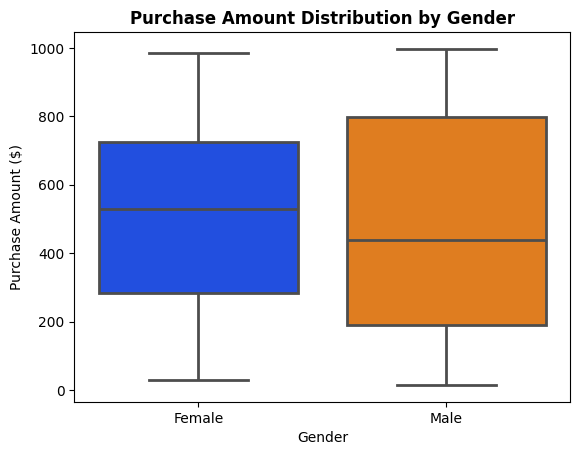

In [17]:
# Q14. Box Plot? (Amount v/s Gender)
# - **Why?** To compare the distribution of purchase amounts between genders.
# - **Outcome?** A box plot showing median, quartiles, and outliers for each gender's purchase amount.

sns.boxplot(x="Gender", y="Purchase Amount ($)", data=df, palette="bright", linewidth = 2 )
plt.title("Purchase Amount Distribution by Gender", fontweight = "bold")
plt.show()

<ipython-input-18-de1bf9bce158>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Product Category", y="Purchase Frequency", data=df, palette="bright",  linewidth = 2)


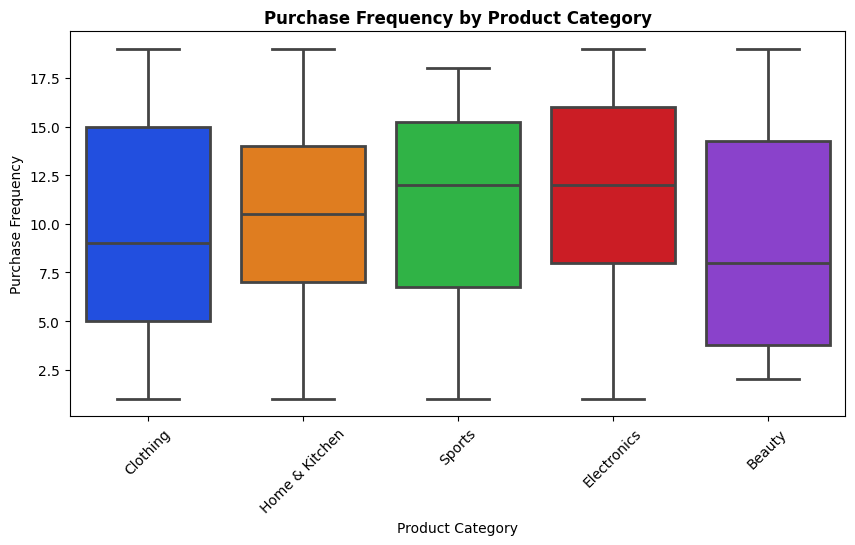

In [18]:
# Q15. Box Plotting? (Frequency v/s Category)
# - **Why?** To analyze the distribution of purchase frequency across product categories.
# - **Outcome?** A box plot displaying median, quartiles, and outliers for each category's purchase frequency.

plt.figure(figsize=(10,5))
sns.boxplot(x="Product Category", y="Purchase Frequency", data=df, palette="bright",  linewidth = 2)
plt.xticks(rotation=45)
plt.title("Purchase Frequency by Product Category", fontweight = "bold")
plt.show()

<ipython-input-19-a89e9c8fe539>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender", data=df, palette="deep",  edgecolor="black", linewidth=1.5)


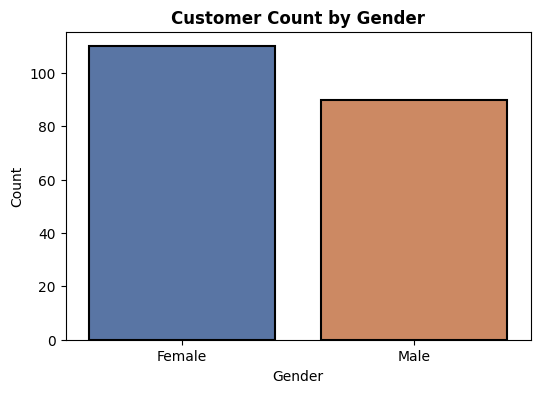

In [19]:
# Q16. CountPlot for Customers by Gender?
# - **Why?** To visualize the number of customers for each gender.
# - **Outcome?** A count plot showing the customer distribution by gender.

plt.figure(figsize=(6,4))
sns.countplot(x="Gender", data=df, palette="deep",  edgecolor="black", linewidth=1.5)
plt.title("Customer Count by Gender", fontweight = "bold")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

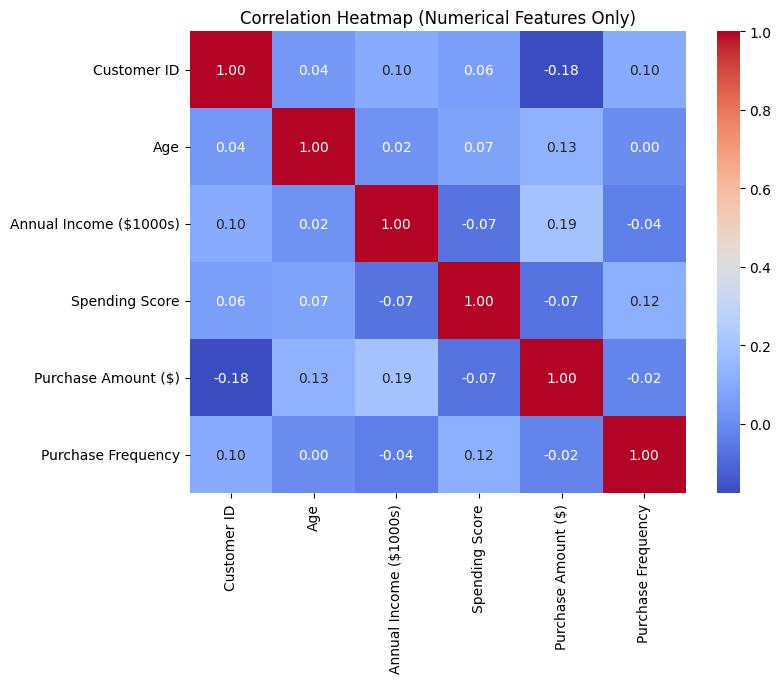

In [20]:
# Q17. Correlation Heatmap?
# - **Why?** To identify relationships between numerical features in the dataset.
# - **Outcome?** A heatmap showing correlation coefficients between numerical variables.

plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include=["number"]).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features Only)")
plt.show()